In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe


In [2]:
df_user_eng = pd.read_csv('takehome_user_engagement.csv')
df_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df_user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
df_user_eng = df_user_eng.sort_values(by = ['user_id', 'time_stamp'])
df_user_eng['time_stamp'] = pd.to_datetime(df_user_eng['time_stamp'])
df_user_eng['date'] = df_user_eng.time_stamp.dt.date



In [5]:
df_user = pd.read_csv('takehome_users.csv',encoding='latin-1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
#Convert time columns to datetime objects

df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])
df_user['last_session_creation_time'] = pd.to_datetime(df_user['last_session_creation_time'], unit='s')


In [8]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [10]:
def check_adopted_user(df, period=7):
    df = df.drop_duplicates(subset = 'date')
    diffDays = df['date'].diff(periods=1)
    
    return any(diffDays <= timedelta(period))



adoptedUsers = df_user_eng.groupby('user_id').apply(check_adopted_user).to_frame()
adoptedUsers.columns = ['adopted_user']


    

In [11]:
df_user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [12]:
df_merge = df_user.join(adoptedUsers, on='object_id')
df_merge.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


In [13]:
df_merge.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [14]:
#Delete records with null last_session_creation_time 
df_merge = df_merge.dropna(subset = ['last_session_creation_time'])
df_merge['duration'] = (df_merge.last_session_creation_time - df_merge.creation_time).astype(str).str.replace(' days','')

df_merge['duration'] = df_merge['duration'].astype(int)

#Drop column invited_by_user_id
df_merge = df_merge.drop(columns=['object_id', 'name','email',
                                  'invited_by_user_id','last_session_creation_time',
                                  'creation_time'])

In [15]:
df_merge['duration'].astype(int)

0          0
1        136
2          0
3          1
4          5
5          2
6          4
9        503
10         1
12         0
13         1
16         3
18         6
19        84
20         0
21         0
22         1
23         0
24         1
26         1
27         3
28         1
29         0
30         1
32        81
35         0
36         1
40         0
41       560
42       105
43         1
44         1
45         0
46         1
47         1
48         0
49       142
50         0
52        85
53         3
54         2
55         1
56         1
57         0
58        86
59        55
60         0
62       531
63         2
64         2
65         0
66         1
67         1
68       700
71         2
72         1
73       222
74         0
75         1
76        28
77         0
79        65
80       336
81       477
82         1
83         1
84         3
85         3
86       253
87         0
88         2
89         0
90         1
91         0
93         5
94        53
95        13

In [16]:
df_merge.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,duration
0,GUEST_INVITE,1,0,11,False,0
1,ORG_INVITE,0,0,1,True,136
2,ORG_INVITE,0,0,94,False,0
3,GUEST_INVITE,0,0,1,False,1
4,GUEST_INVITE,0,0,193,False,5


## Data Exploration for each field

#### creation_source

In [17]:
creation_source = df_merge.groupby(['creation_source', 'adopted_user']).size().reset_index(name='counts')

creation_source

,creation_source,adopted_user,counts
0,GUEST_INVITE,False,1084
1,GUEST_INVITE,True,504
2,ORG_INVITE,False,2410
3,ORG_INVITE,True,778
4,PERSONAL_PROJECTS,False,536
5,PERSONAL_PROJECTS,True,228
6,SIGNUP,False,1481
7,SIGNUP,True,417
8,SIGNUP_GOOGLE_AUTH,False,1082
9,SIGNUP_GOOGLE_AUTH,True,303


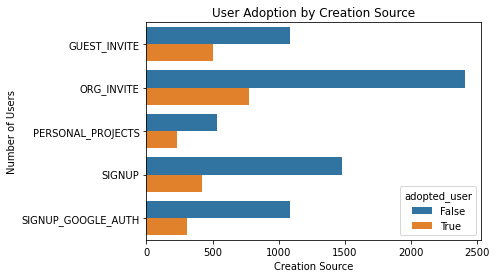

In [18]:
sns.barplot(data=creation_source, y='creation_source', x='counts', hue='adopted_user')
plt.title('User Adoption by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Number of Users')
plt.show()

Most of the adopted user were invited  to  an  organization(as  a  full  member)

#### opted_in_to_mailing_list

   opted_in_to_mailing_list  adopted_user  counts
0                         0         False    4954
1                         0          True    1643
2                         1         False    1639
3                         1          True     587


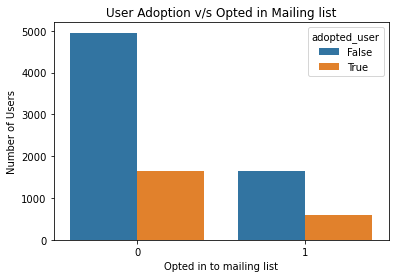

In [19]:
opted_in_to_mailing_list = df_merge.groupby(['opted_in_to_mailing_list', 'adopted_user']).size().reset_index(name='counts')

print(opted_in_to_mailing_list)

sns.barplot(data=opted_in_to_mailing_list, x='opted_in_to_mailing_list', y='counts', hue='adopted_user')
plt.title('User Adoption v/s Opted in Mailing list')
plt.xlabel('Opted in to mailing list')
plt.ylabel('Number of Users')
plt.show()

Users who didnot opt in mailing list didnot convert into adopted user

#### enabled_for_marketing_drip

   enabled_for_marketing_drip  adopted_user  counts
0                           0         False    5607
1                           0          True    1875
2                           1         False     986
3                           1          True     355


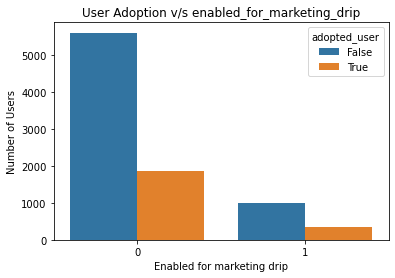

In [20]:
enabled_for_marketing_drip = df_merge.groupby(['enabled_for_marketing_drip', 'adopted_user']).size().reset_index(name='counts')

print(enabled_for_marketing_drip)

sns.barplot(data=enabled_for_marketing_drip, x='enabled_for_marketing_drip', y='counts', hue='adopted_user')
plt.title('User Adoption v/s enabled_for_marketing_drip')
plt.xlabel('Enabled for marketing drip')
plt.ylabel('Number of Users')
plt.show()

Users who enabled for marketing drip didnot converted into adopted user

#### org_id

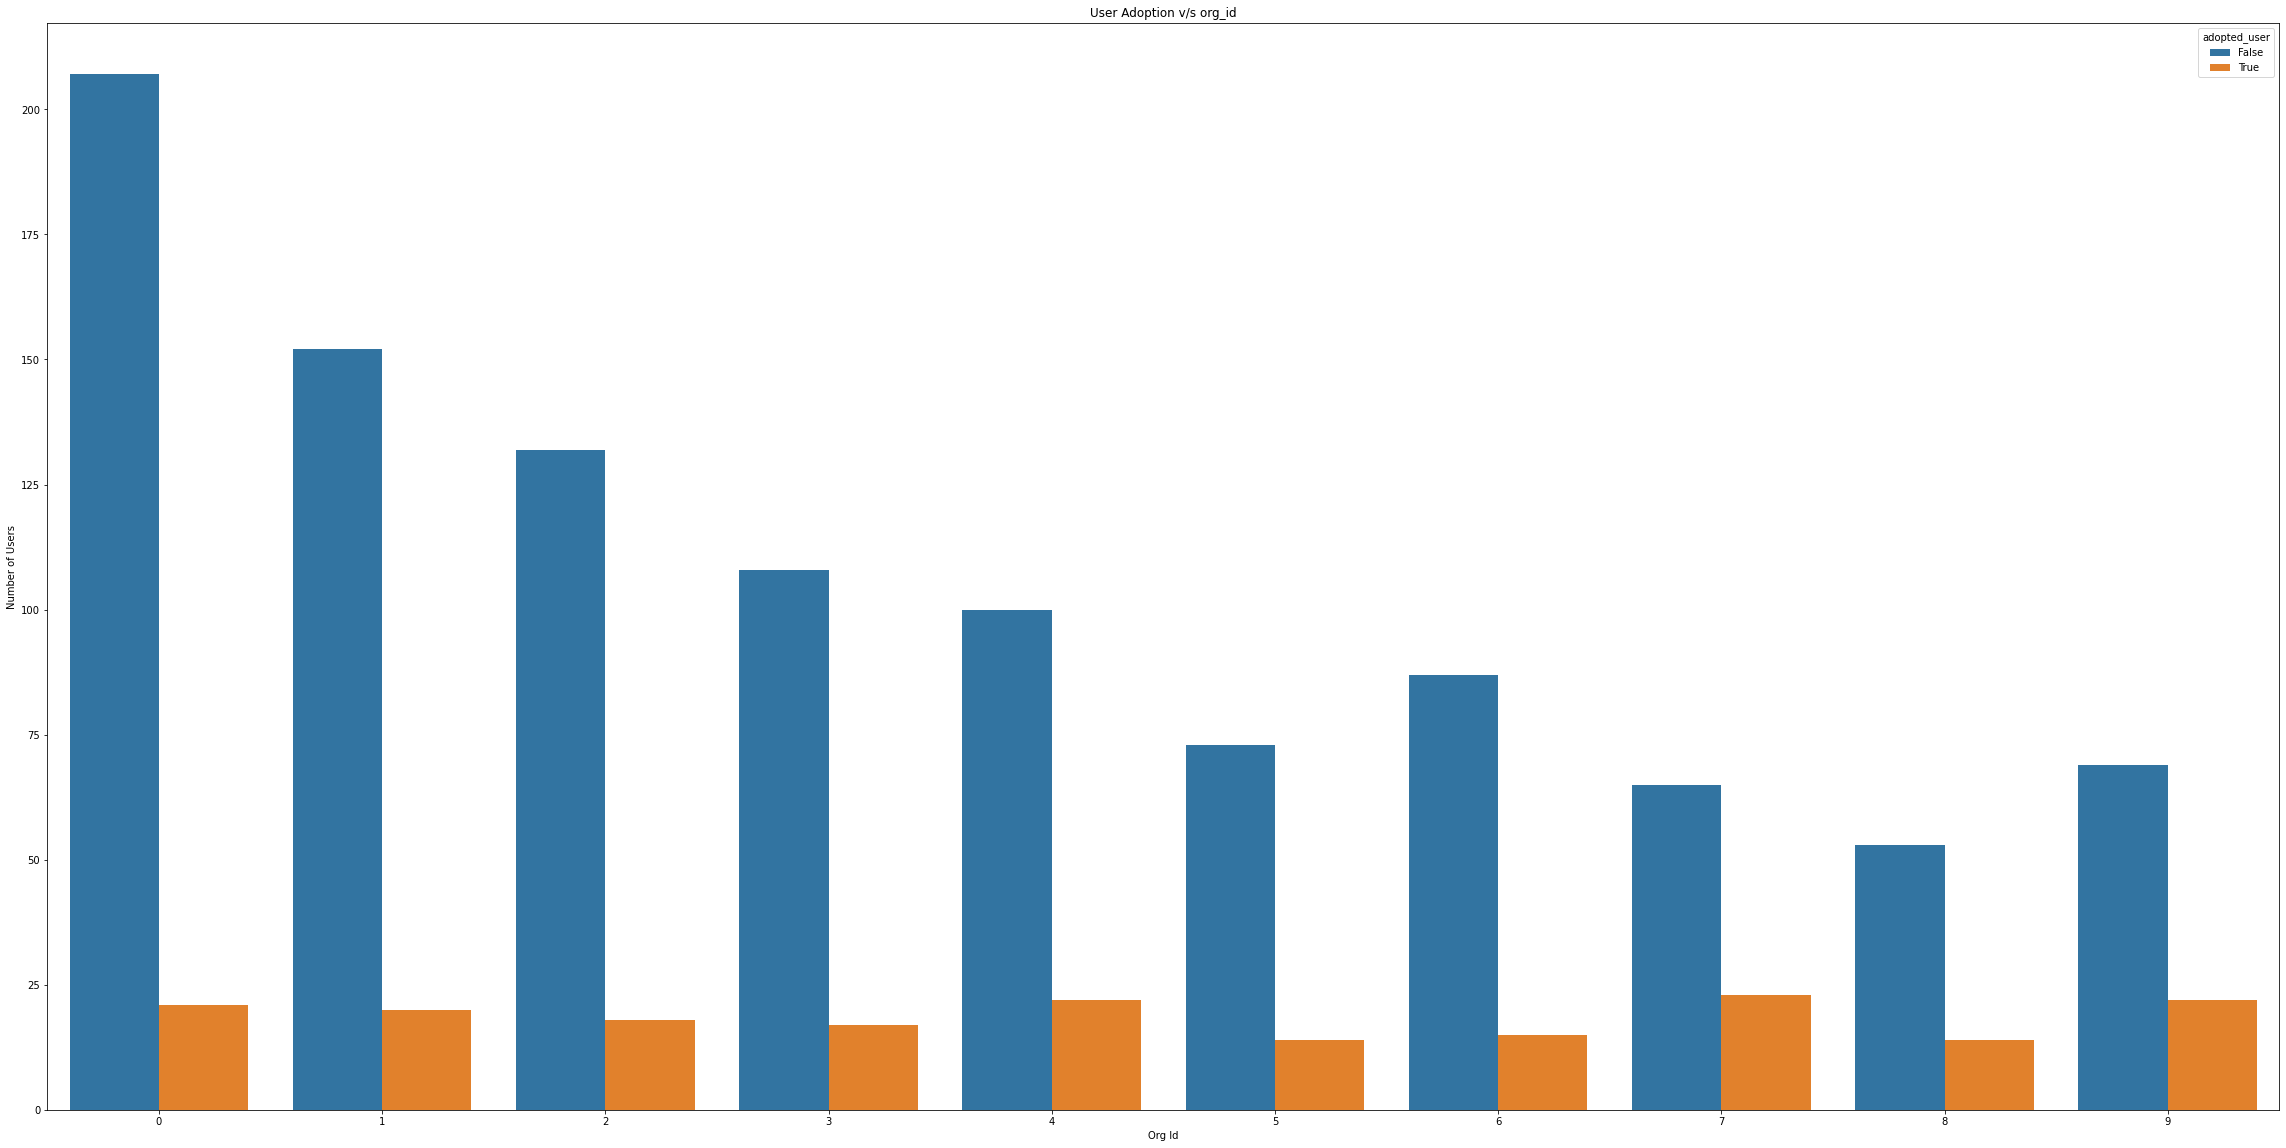

In [21]:

org_id = df_merge.groupby(['org_id', 'adopted_user']).size().reset_index(name='counts')

#print(org_id)

plt.figure(figsize=(40,20))
sns.barplot(data=org_id.head(20), x='org_id', y='counts', hue='adopted_user')
plt.title('User Adoption v/s org_id')
plt.xlabel('Org Id')
plt.ylabel('Number of Users')
plt.show()

In [22]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             8823 non-null   object
 1   opted_in_to_mailing_list    8823 non-null   int64 
 2   enabled_for_marketing_drip  8823 non-null   int64 
 3   org_id                      8823 non-null   int64 
 4   adopted_user                8823 non-null   object
 5   duration                    8823 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 482.5+ KB


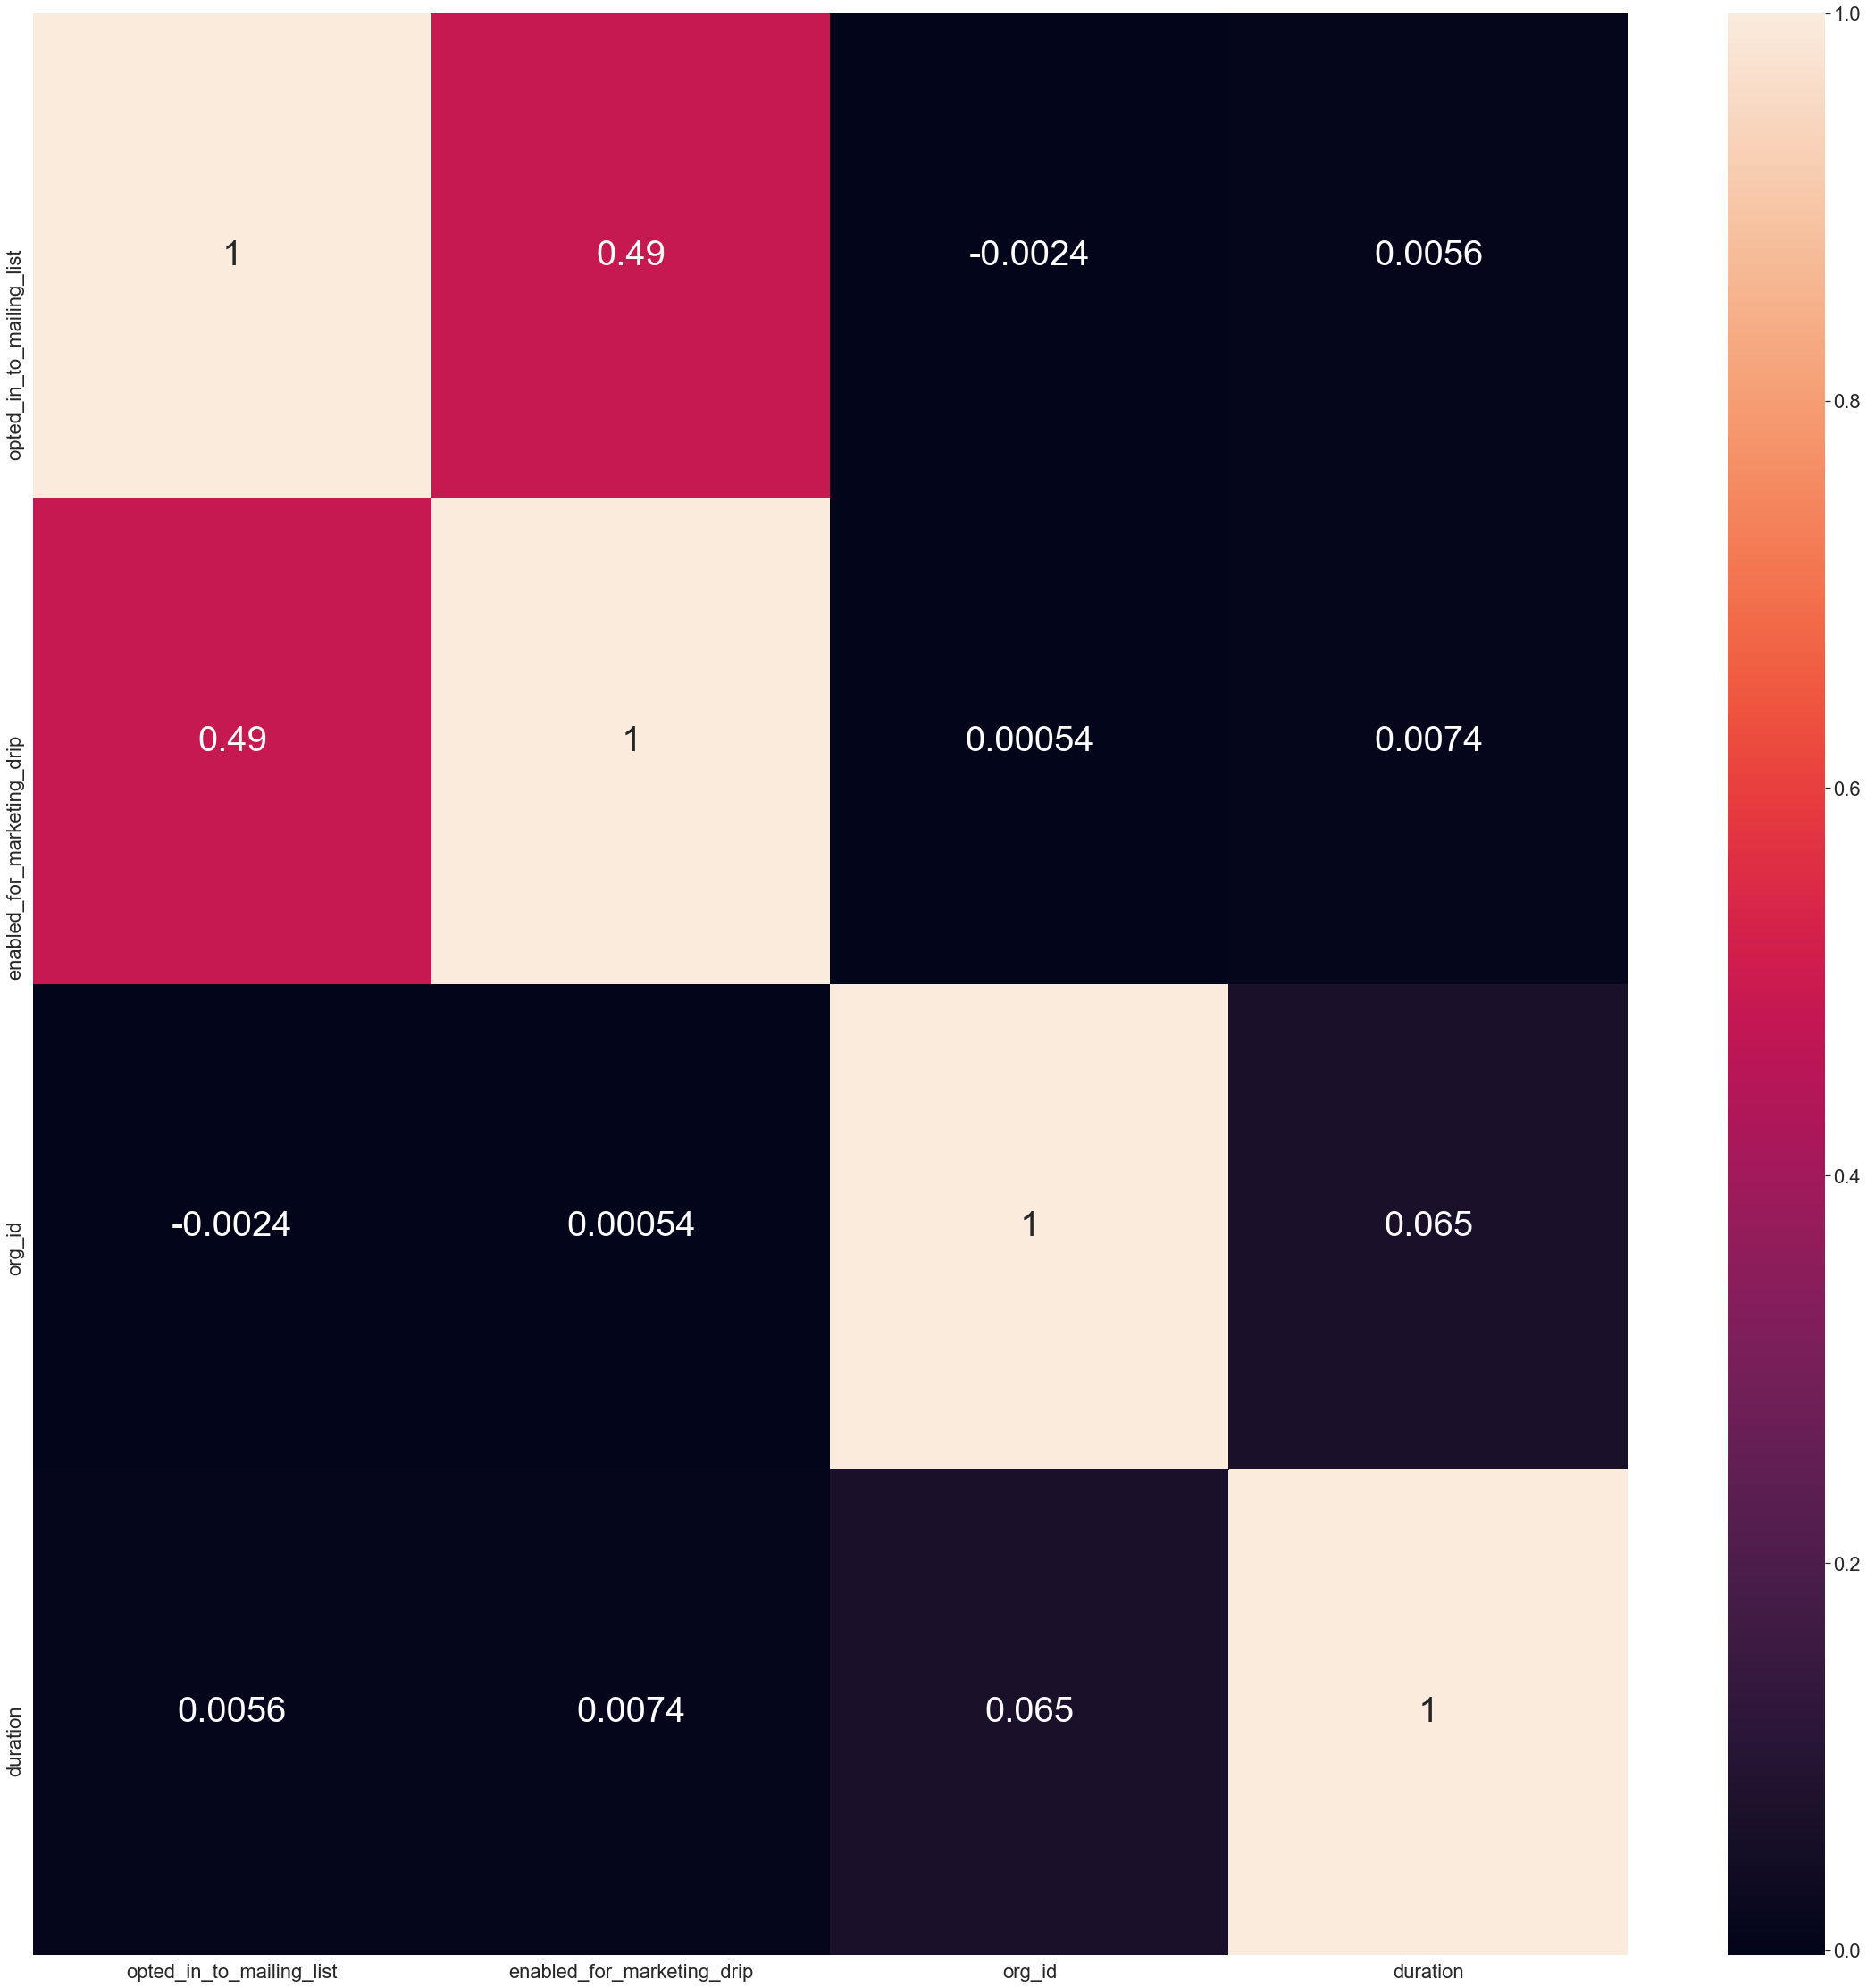

In [23]:
#Create correlation heatmap
sns.set(font_scale=2) # font size 4
plt.figure(figsize=(40,40))
sns.heatmap(df_merge.corr(), annot=True, annot_kws={"size": 40})
plt.show()

## Preprocessing for Modeling

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix,precision_score, recall_score,accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [25]:
X  = df_merge.drop(columns='adopted_user')
y = df_merge.adopted_user.astype(int)


In [26]:
#Convert Categorical data

X = pd.get_dummies(X)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,duration,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,0,1,0,0,0,0
1,0,0,1,136,0,1,0,0,0
2,0,0,94,0,0,1,0,0,0
3,0,0,1,1,1,0,0,0,0
4,0,0,193,5,1,0,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=11)


In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6176 entries, 5515 to 5156
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            6176 non-null   int64
 1   enabled_for_marketing_drip          6176 non-null   int64
 2   org_id                              6176 non-null   int64
 3   duration                            6176 non-null   int64
 4   creation_source_GUEST_INVITE        6176 non-null   uint8
 5   creation_source_ORG_INVITE          6176 non-null   uint8
 6   creation_source_PERSONAL_PROJECTS   6176 non-null   uint8
 7   creation_source_SIGNUP              6176 non-null   uint8
 8   creation_source_SIGNUP_GOOGLE_AUTH  6176 non-null   uint8
dtypes: int64(4), uint8(5)
memory usage: 271.4 KB


In [30]:
y_train.head()

5515     1
1569     0
1039     0
11843    0
10843    0
Name: adopted_user, dtype: int64

### Random Forest

In [31]:
#Define the pipeline
rf_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                        StandardScaler(),
                        RandomForestClassifier(random_state=11)
                        )

#Call cross_validate to estimate the pipeline performance

rf_default_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train score     : ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train score     :  [0.94366197 0.93880525 0.94557823]
Mean Cross Validation train score:  0.9426818161293982
Standard deviation CV train score:  0.0028505980463516822


In [32]:
#Hyperparameter tuning using Randomized Search

rf_clf = RandomForestClassifier(random_state=11)
params = {'n_estimators'      : [10,50,100,200],
          'max_features'      : ['auto','sqrt','log2'],
          'max_depth'         : np.arange(4,50),
          'criterion'         : ['gini','entropy'],
          'min_samples_split' : [2,3,4]
         }

model = RandomizedSearchCV(rf_clf, param_distributions=params, cv=5)
model.fit(X_train_scaled,y_train)

print("Best Parameters for RandomForestClassifier       : ", model.best_params_)
print("\n")
print("Best average accuracy for RandomForestClassifier :", model.best_score_)

Best Parameters for RandomForestClassifier       :  {'n_estimators': 200, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'gini'}


Best average accuracy for RandomForestClassifier : 0.9499665893636257


In [33]:
#Fitting with parameters

best_rf = RandomForestClassifier(**model.best_params_ , random_state=11) 
best_rf.fit(X_train_scaled,y_train)
y_pred = best_rf.predict(X_test_scaled)


The accuracy score of RandomForest prediction :  0.9482432942954288
Precision Score                               :  0.9221800363727256
Recall Score                                  :  0.945954189206619


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1982
           1       0.86      0.94      0.90       665

    accuracy                           0.95      2647
   macro avg       0.92      0.95      0.93      2647
weighted avg       0.95      0.95      0.95      2647



Confusion matrix


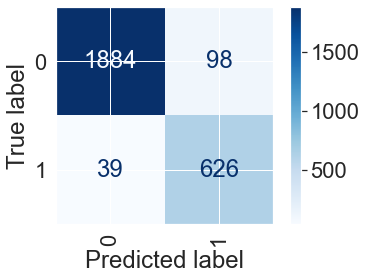

In [34]:
print("The accuracy score of RandomForest prediction : ", accuracy_score(y_test,y_pred))
print("Precision Score                               : ", precision_score(y_test, y_pred, average='macro'))
print("Recall Score                                  : ", recall_score(y_test,y_pred, average='macro'))
print("\n")

print("Classification Report")
print(classification_report(y_test, y_pred))

print("\n")
print("Confusion matrix")
plot_confusion_matrix(best_rf, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()


In [35]:
features = pd.DataFrame({'Predictors' : X.columns, 'feature_importance':best_rf.feature_importances_})
features = features.sort_values(by='feature_importance',ascending=False)

features

,Predictors,feature_importance
3,duration,0.964756
2,org_id,0.023209
4,creation_source_GUEST_INVITE,0.003644
0,opted_in_to_mailing_list,0.002107
1,enabled_for_marketing_drip,0.001793
8,creation_source_SIGNUP_GOOGLE_AUTH,0.001308
6,creation_source_PERSONAL_PROJECTS,0.001194
7,creation_source_SIGNUP,0.001000
5,creation_source_ORG_INVITE,0.000989


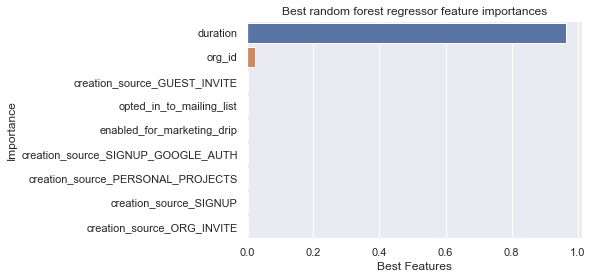

In [36]:
sns.set(font_scale=1)
sns.barplot(data=features, x='feature_importance', y='Predictors')
plt.xlabel('Best Features')
plt.ylabel('Importance')
plt.title('Best random forest regressor feature importances')
plt.show()

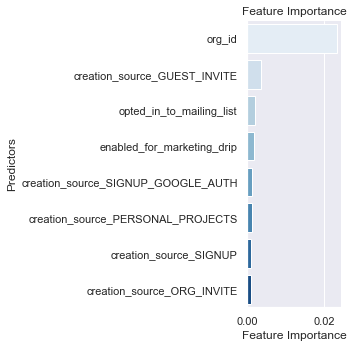

In [37]:

sns.catplot(data=features[1:], x = 'feature_importance', y = 'Predictors', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Conclusion

The accuracy of the model is 94.74%. The most important features for predicting adopted user is the duration the user is using the application. Which org_id, do they belong to 
and if they have opted for mailing list. 